In [1]:
import pandas as pd
import numpy as np
import os
import explore_r as ex
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
from sklearn.model_selection import train_test_split
import scipy.stats as stats

## READ .csv

In [2]:
df = pd.read_csv('prepped_data.csv')

In [4]:
df.sample(20)

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,...,ou,is_under,is_push,abnormal_start,playoffs,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
3654,2009-10-11,Sunday,1,5,33,2,14,0,62,45,...,42.0,0,0,0,0,47,0,0,0,1
2728,2012-12-16,Sunday,4,15,7,5,31,4,59,64,...,45.5,1,0,0,0,38,0,0,0,1
794,2020-09-24,Thursday,8,3,13,1,31,0,81,75,...,49.5,1,0,1,0,44,0,0,0,1
6060,2000-09-03,Sunday,4,1,23,0,0,0,89,59,...,36.0,1,0,0,0,23,0,0,0,1
560,2021-09-12,Sunday,8,1,34,0,14,0,72,0,...,46.5,0,0,1,0,48,0,0,1,0
6752,1997-09-28,Sunday,1,5,24,2,12,3,64,85,...,43.5,1,0,0,0,36,0,0,0,1
9351,1985-12-08,Sunday,4,14,26,6,7,2,72,0,...,45.0,1,0,0,0,33,0,1,1,0
3124,2011-10-16,Sunday,8,6,39,2,10,1,56,48,...,42.0,0,0,1,0,49,0,0,0,1
3177,2011-09-18,Sunday,1,2,20,0,24,0,72,0,...,41.0,0,0,0,0,44,0,0,1,0
8978,1987-11-29,Sunday,1,12,16,6,20,7,47,95,...,40.0,1,0,0,0,36,0,1,1,1


## drop cols

In [6]:
df.drop(columns=['playoffs', 'is_push'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  10811 non-null  object 
 1   day_of_week           10811 non-null  object 
 2   start_time            10811 non-null  int64  
 3   week_num              10811 non-null  int64  
 4   home_score            10811 non-null  int64  
 5   home_wins             10811 non-null  int64  
 6   away_score            10811 non-null  int64  
 7   away_wins             10811 non-null  int64  
 8   temp                  10811 non-null  int64  
 9   humidity              10811 non-null  int64  
 10  wind                  10811 non-null  int64  
 11  spread                10811 non-null  float64
 12  ou                    10811 non-null  float64
 13  is_under              10811 non-null  int64  
 14  abnormal_start        10811 non-null  int64  
 15  total_scores       

## redefine spread column

In [8]:
df['spread'] = abs(df['spread'])

In [10]:
df.sample(10)

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
5021,2004-09-12,Sunday,1,1,20,0,3,0,72,45,6,3.5,37.0,1,0,23,0,0,0,1
5519,2002-09-22,Sunday,4,3,28,2,23,1,59,48,3,7.5,47.0,0,0,51,0,0,0,1
651,2020-12-06,Sunday,4,13,0,3,45,5,72,0,0,2.0,46.5,1,0,45,0,1,1,0
743,2020-10-18,Sunday,1,6,12,2,18,1,58,45,7,7.0,43.5,1,0,30,0,0,1,1
7281,1995-09-10,Sunday,1,2,3,1,20,1,64,60,17,1.0,46.0,1,0,23,0,0,0,1
927,2019-11-24,Sunday,4,12,42,5,20,4,52,54,9,4.5,42.0,0,0,62,0,1,0,1
10020,1983-01-02,Sunday,4,17,20,3,21,1,41,76,6,10.0,51.0,1,0,41,0,0,0,1
7568,1993-12-26,Sunday,4,17,10,9,17,4,41,38,10,13.5,38.0,1,0,27,0,1,0,1
2783,2012-11-18,Sunday,1,11,20,4,24,6,72,0,0,3.0,53.5,1,0,44,0,1,1,0
6266,1999-10-03,Sunday,1,4,38,2,36,1,78,0,0,8.5,45.5,0,0,74,0,0,0,1


## UNIVARIATE Analysis

## Summary

In [5]:
ex.summarize(df)

SUMMARY REPORT


Dataframe head: 
         date day_of_week  start_time  week_num  home_score  home_wins  \
0  2023-02-12      Sunday           6        19          35         16   
1  2023-01-29      Sunday           3        19          31         15   
2  2023-01-29      Sunday           6        19          23         15   
3  2023-01-22      Sunday           3        19          10         14   
4  2023-01-22      Sunday           6        19          19         14   

   away_score  away_wins  temp  humidity  ...    ou  is_under  is_push  \
0          38         16    72         0  ...  51.0         0        0   
1           7         15    52        48  ...  45.5         1        0   
2          20         14    22        55  ...  48.0         1        0   
3          27         13    32        10  ...  49.0         1        0   
4          12         13    55        47  ...  47.0         1        0   

   abnormal_start  playoffs  total_scores  is_playoff  playoff_implications 

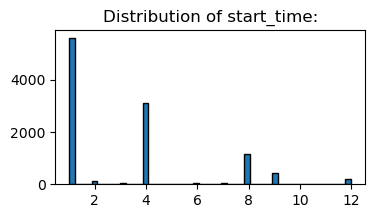

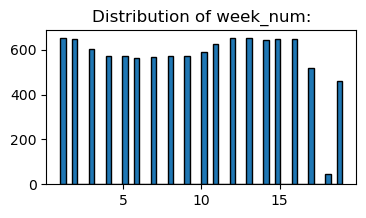

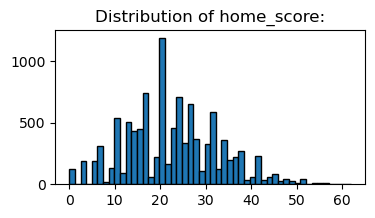

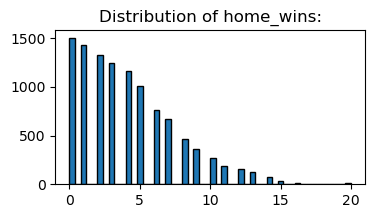

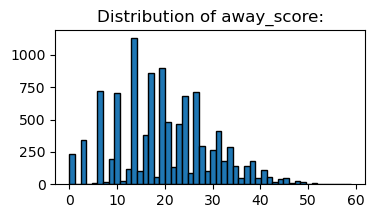

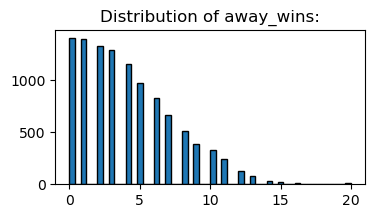

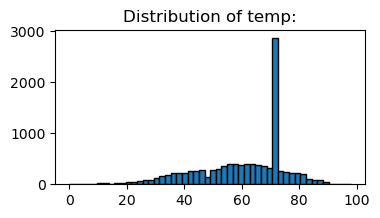

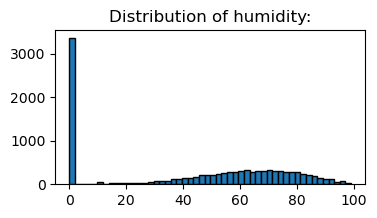

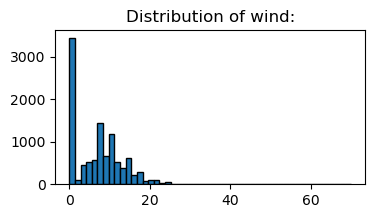

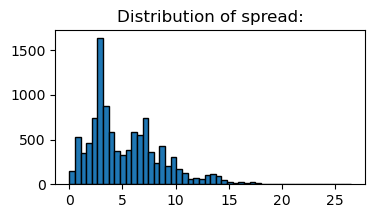

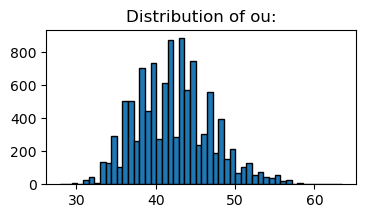

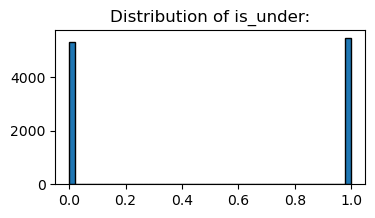

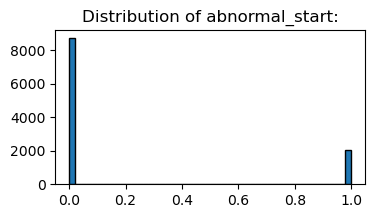

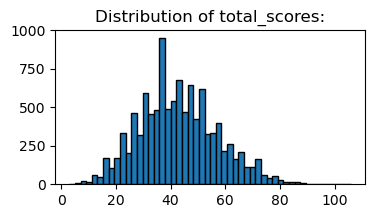

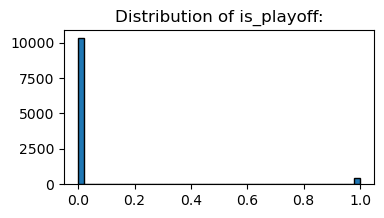

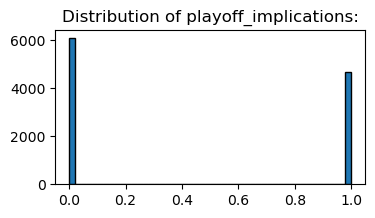

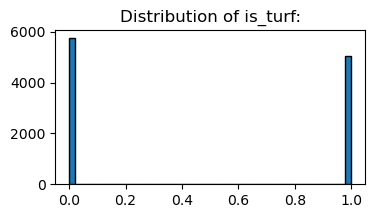

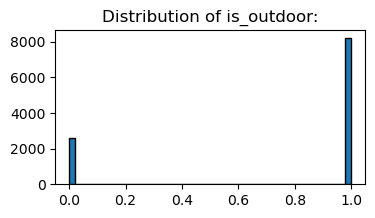

In [11]:
ex.get_hist(df)

## Now we split into TRAIN-VALIDATE-TEST for Bivariate Analysis and Statistical Testing

In [12]:
train, validate, test = ex.split_data(df)

In [13]:
train.shape, validate.shape, test.shape

((6471, 20), (2394, 20), (1946, 20))

In [14]:
train.columns.to_list()

['date',
 'day_of_week',
 'start_time',
 'week_num',
 'home_score',
 'home_wins',
 'away_score',
 'away_wins',
 'temp',
 'humidity',
 'wind',
 'spread',
 'ou',
 'is_under',
 'abnormal_start',
 'total_scores',
 'is_playoff',
 'playoff_implications',
 'is_turf',
 'is_outdoor']

## GroupBy Target...just numbers

In [53]:
df_mean_by_target = train.groupby(by=['is_under']).mean()

In [54]:
df_mean_by_target.drop(columns=['start_time', 'home_score','home_wins','away_score',
                                'away_wins','total_scores'], inplace=True)

In [39]:
df_std_by_target = train.groupby(by='is_under').std()

In [40]:
df_std_by_target.drop(columns=['start_time', 'home_score','home_wins','away_score',
                                'away_wins','total_scores'], inplace=True)

In [55]:
df_mean_by_target

,week_num,temp,humidity,wind,spread,ou,abnormal_start,is_playoff,playoff_implications,is_turf,is_outdoor
is_under,,,,,,,,,,,
0,9.519497,60.322956,42.680189,6.565094,5.378774,42.191038,0.178616,0.043711,0.433333,0.471069,0.753145
1,9.504710,60.170161,44.421452,7.155880,5.403677,42.405834,0.190520,0.042236,0.430872,0.443634,0.777575


In [41]:
df_std_by_target

,week_num,temp,humidity,wind,spread,ou,abnormal_start,is_playoff,playoff_implications,is_turf,is_outdoor
is_under,,,,,,,,,,,
0,5.210685,15.930481,32.730705,5.778373,3.453621,4.753079,0.383091,0.204483,0.495614,0.499241,0.431250
1,5.212758,15.970629,32.649658,6.223034,3.506852,4.755404,0.392771,0.201159,0.495274,0.496888,0.415938


In [56]:
df_mean_by_target_by_inout = train.groupby(by=['is_under','is_outdoor']).mean()

In [57]:
df_mean_by_target_by_inout.drop(columns=['start_time', 'home_score','home_wins','away_score',
                                'away_wins','total_scores'], inplace=True)

In [58]:
df_mean_by_target_by_inout

week_num       temp   humidity      wind    spread  \
is_under is_outdoor                                                       
0        0           9.633121  72.000000   0.000000  0.000000  5.101911   
         1           9.482255  56.495616  56.669311  8.716910  5.469520   
1        0           9.669399  72.000000   0.000000  0.000000  5.568989   
         1           9.457601  56.786245  57.128175  9.202814  5.356389   

                            ou  abnormal_start  is_playoff  \
is_under is_outdoor                                          
0        0           44.109554        0.201274    0.042038   
         1           41.562213        0.171190    0.044259   
1        0           44.278825        0.188525    0.028689   
         1           41.870066        0.191090    0.046112   

                     playoff_implications   is_turf  
is_under is_outdoor                                  
0        0                       0.426752  0.866242  
         1                       0.435491  0.341545  
1        0                       0.452186  0.887978  
         1                       0.424775  0.316530

## TEMP vs TARGET: all games

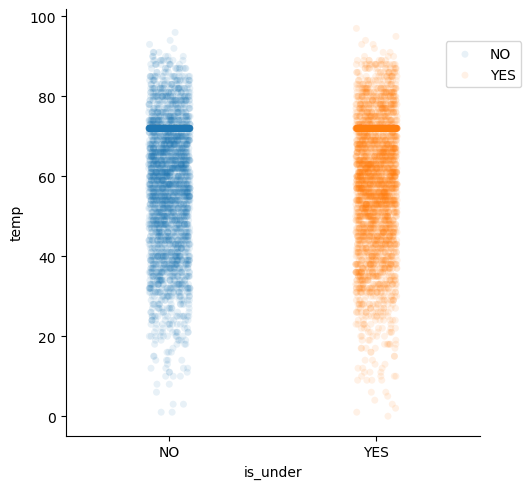

In [33]:
sns.catplot(data=train, x='is_under', y='temp',hue='is_under',order=[0,1],ec='black',alpha=0.1)
plt.xticks(ticks=[0,1],labels=['NO','YES'])
# plt.xlabel('playoffs')
# plt.ylabel('opp_pts')
plt.legend(labels=['NO','YES'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

#### Solid line is at 72$^{\circ}$ F: Indoor Games - the preponderance of indoor games (72 $^{\circ}$) may be skewing this...let's view only OUTDOOR games.

In [42]:
df.head()

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
0,2023-02-12,Sunday,6,19,35,16,38,16,72,0,0,1.0,51.0,0,0,73,1,1,0,0
1,2023-01-29,Sunday,3,19,31,15,7,15,52,48,14,2.5,45.5,1,0,38,1,1,0,1
2,2023-01-29,Sunday,6,19,23,15,20,14,22,55,13,1.5,48.0,1,0,43,1,1,0,1
3,2023-01-22,Sunday,3,19,10,14,27,13,32,10,0,5.5,49.0,1,0,37,1,1,1,1
4,2023-01-22,Sunday,6,19,19,14,12,13,55,47,19,4.0,47.0,1,0,31,1,1,0,1


## TEMP vs TARGET: OUTDOOR games

In [45]:
train_outdoor = train[train.is_outdoor == 1]
train_indoor = train[train.is_outdoor == 0]

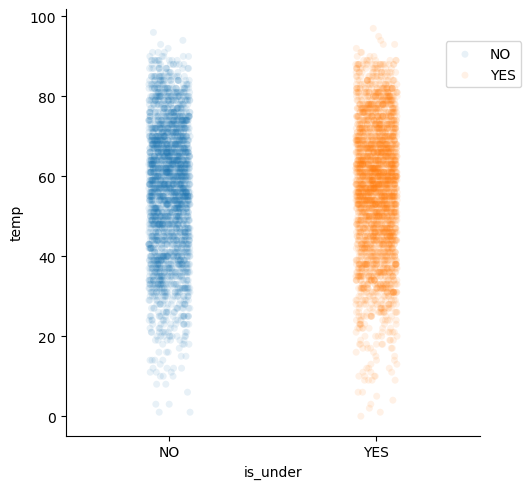

In [44]:
sns.catplot(data=train_outdoor, x='is_under', y='temp',hue='is_under',order=[0,1],ec='black',alpha=0.1)
plt.xticks(ticks=[0,1],labels=['NO','YES'])
# plt.xlabel('playoffs')
# plt.ylabel('opp_pts')
plt.legend(labels=['NO','YES'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

## WIND vs TARGET: OUTDOOR games

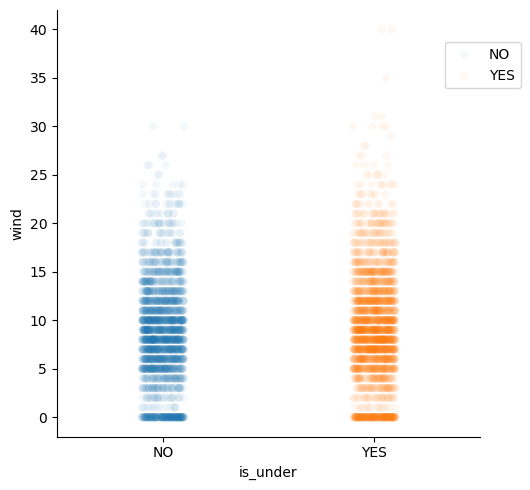

In [83]:
sns.catplot(data=train_outdoor, x='is_under', y='wind',hue='is_under',order=[0,1],ec='black',alpha=0.05,s=6)
plt.xticks(ticks=[0,1],labels=['NO','YES'])
# plt.xlabel('playoffs')
# plt.ylabel('opp_pts')
plt.legend(labels=['NO','YES'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

## MEAN Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games
### Does a statistically significant difference exist between Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games?
#### T-test, 2-sample, 2-tailed
### Hypotheses:
- ${H_0}$: No statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.
- ${H_a}$: A statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.

In [70]:
# type "\alpha", then hit the TAB key
α = 0.05
wind_under_values = train[train.is_under == 1].wind
wind_over_values = train[train.is_under == 0].wind
t, p = stats.ttest_ind(wind_under_values,wind_over_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

3.9540841378709994 7.764812347880434e-05 0.05
p = 0.000078


### With a p-value well below $\alpha$ = 0.05, we reject the null hypothesis.  There is evidence to suggest that the two samples were drawn from different populations.  i.e. Wind Speed may play a role in determining the outcome of the wager.

## MEAN Wind Speed of OUTDOOR UNDER games vs MEAN Wind Speed of OUTDOOR OVER games
### Does a statistically significant difference exist between Wind Speed of OUTDOOR UNDER games vs MEAN Wind Speed of OUTDOOR OVER games?
#### T-test, 2-sample, 2-tailed
### Hypotheses:
- ${H_0}$: No statistically significant difference exists between mean wind speed for OUTDOOR UNDER games and that of OUTDOOR OVER games.
- ${H_a}$: A statistically significant difference exists between mean wind speed for OUTDOOR UNDER games and that of OUTDOOR OVER games.

In [72]:
# type "\alpha", then hit the TAB key
α = 0.05
wind_under_values = train_outdoor[train_outdoor.is_under == 1].wind
wind_over_values = train_outdoor[train_outdoor.is_under == 0].wind
t, p = stats.ttest_ind(wind_under_values,wind_over_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

3.209420840661326 0.0013385130004450586 0.05
p = 0.001339


### With a p-value well below $\alpha$ = 0.05, we reject the null hypothesis.  There is evidence to suggest that the two samples were drawn from different populations.  i.e. Wind Speed may play a role in determining the outcome of the wager.

In [92]:
# train.groupby(by='wind').mean()

,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
wind,,,,,,,,,,,,,,,,,
0,3.213928,9.762525,23.838176,4.068136,20.985471,4.204409,68.656814,3.102705,5.305611,44.061172,0.492485,0.206413,44.823647,0.037575,0.448898,0.732966,0.23998
1,3.500000,8.781250,25.781250,4.125000,22.562500,4.031250,58.718750,60.906250,4.531250,44.671875,0.531250,0.250000,48.343750,0.031250,0.406250,0.500000,1.00000
2,4.220588,8.720588,23.088235,3.617647,21.382353,3.558824,58.764706,58.838235,5.389706,44.264706,0.544118,0.382353,44.470588,0.014706,0.397059,0.411765,1.00000
3,3.492308,8.730769,21.669231,3.400000,21.369231,3.523077,61.146154,55.161538,5.153846,42.592308,0.492308,0.200000,43.038462,0.007692,0.361538,0.246154,1.00000
4,3.566038,9.685535,23.251572,4.283019,21.666667,4.522013,57.628931,59.396226,5.713836,43.729560,0.496855,0.232704,44.918239,0.062893,0.471698,0.320755,1.00000
5,3.504792,9.287540,22.897764,4.000000,20.492013,3.955272,60.246006,58.977636,5.359425,41.611821,0.466454,0.210863,43.389776,0.054313,0.428115,0.249201,1.00000
6,2.991071,9.422619,22.675595,3.991071,20.848214,3.883929,55.723214,60.125000,5.287202,41.724702,0.470238,0.133929,43.523810,0.035714,0.404762,0.273810,1.00000
7,3.197150,9.567696,22.304038,4.213777,19.038005,4.123515,58.009501,62.052257,5.401425,41.519002,0.529691,0.185273,41.342043,0.035629,0.427553,0.261283,1.00000
8,3.479079,9.194561,22.543933,4.037657,20.087866,4.058577,58.619247,63.918410,5.495816,41.739540,0.495816,0.182008,42.631799,0.050209,0.420502,0.290795,1.00000


In [116]:
a = pd.DataFrame(train.groupby(by='wind').is_under.mean())

In [120]:
b = pd.DataFrame(train.groupby(by='wind').wind.count())

In [131]:
wind_dist = pd.concat([a,b],axis=1)
wind_dist.columns = ['under_pct','count']

In [132]:
wind_dist.sort_values('under_pct',ascending=False)

,under_pct,count
wind,,
40,1.000000,2
29,1.000000,1
28,1.000000,2
35,1.000000,1
31,1.000000,2
25,0.750000,8
21,0.685714,35
30,0.666667,6
18,0.661538,65


<AxesSubplot:ylabel='wind'>

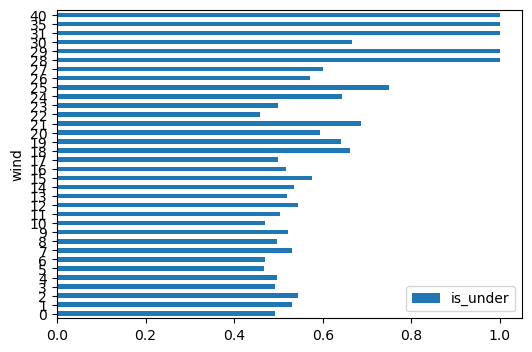

In [148]:
a.sort_index().plot.barh()

<AxesSubplot:ylabel='wind'>

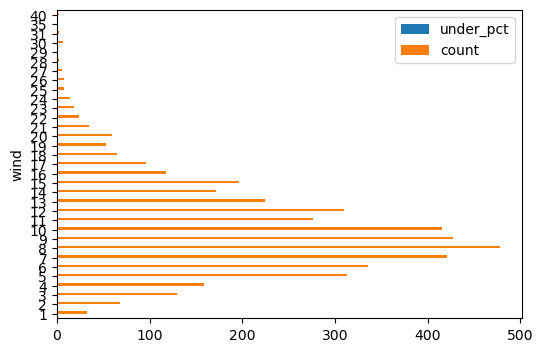

In [146]:
wind_dist[wind_dist.index != 0].sort_index().plot.barh()

### Define WINDY and non-WINDY

In [158]:
train_windy = train[train.wind >= 14]
train_not_windy = train[train.wind < 14]

In [159]:
train_windy.is_under.value_counts(normalize=True)

1    0.570136
0    0.429864
Name: is_under, dtype: float64